In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data1 = pd.read_csv('../prices/prices_round_3_day_0.csv', header = 0, sep=";")
data2 = pd.read_csv('../prices/prices_round_3_day_1.csv', header = 0, sep=";")
data3 = pd.read_csv('../prices/prices_round_3_day_2.csv', header = 0, sep=";")

# Join rows of data1, data2 and data3
data = pd.concat([data1, data2, data3])
data = data.reset_index(drop=True) # Reset indices
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


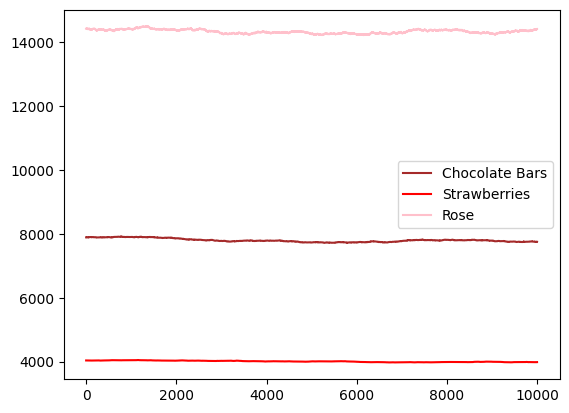

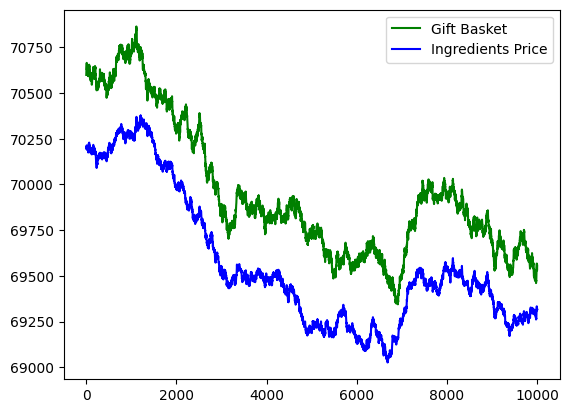

In [62]:
working_data = data3

chocolate = working_data[working_data['product'] == 'CHOCOLATE'].reset_index(drop=True)
strawberries = working_data[working_data['product'] == 'STRAWBERRIES'].reset_index(drop=True)
roses = working_data[working_data['product'] == 'ROSES'].reset_index(drop=True)
gift_basket = working_data[working_data['product'] == 'GIFT_BASKET'].reset_index(drop=True)

ingredients_price = 4 * chocolate['mid_price'] + 6 * strawberries['mid_price'] + roses['mid_price']

plt.plot(chocolate['mid_price'], label='Chocolate Bars', color='brown')
plt.plot(strawberries['mid_price'], label='Strawberries', color='red')
plt.plot(roses['mid_price'], label='Rose', color='pink')
plt.legend()
plt.show()

plt.plot(gift_basket['mid_price'], label='Gift Basket', color='green')
plt.plot(ingredients_price, label='Ingredients Price', color='blue')
plt.legend()
plt.show()

Mean premium: 386.299.
Standard deviation: 76.0688.


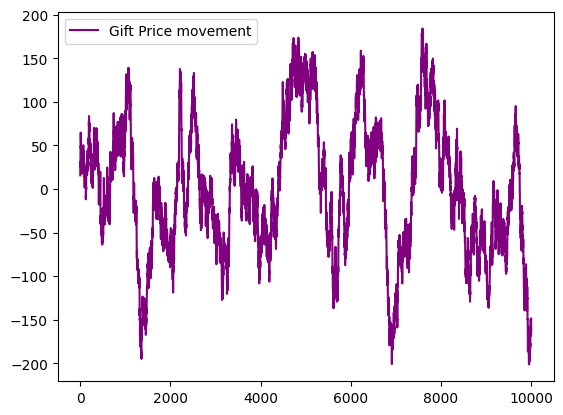

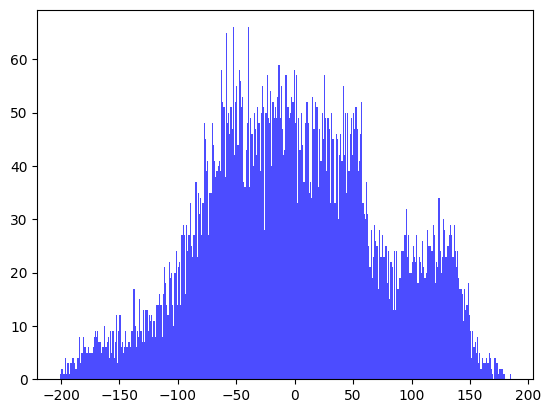

In [63]:
premium = np.mean(gift_basket['mid_price'] - ingredients_price)
print(f"Mean premium: {round(premium,4)}.")
movement = gift_basket['mid_price'] - ingredients_price - premium
print(f"Standard deviation: {round(np.std(movement),4)}.")

plt.plot(movement, label='Gift Price movement', color='purple')
plt.legend()
plt.show()

plt.hist(movement, bins = range(round(np.min(movement)), round(np.max(movement)) + 2), alpha=0.7, color='blue')
plt.show()

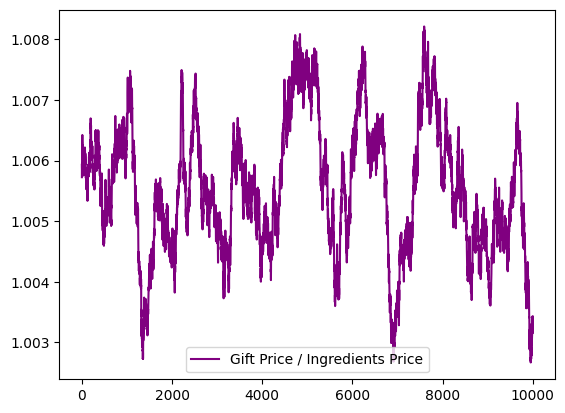

In [64]:
plt.plot(gift_basket['mid_price'] / ingredients_price, label='Gift Price / Ingredients Price', color='purple')
plt.legend()
plt.show()